In [1]:
# importing necessary packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [2]:
# reading in the data set
df = pd.read_csv('mig174.csv', dtype='string', keep_default_na=False)

In [3]:
# selecting features
new_df = df[['sex','age','statebrn','marstat','edyrs','occ','@by','usdoc1','usstate1','usocc1','uswage1','usby1',
             'ustrips','usexp','crsst1','crspl1','crshow1','crscoy1','crscst1','crsdep1']]

In [4]:
# removing all 1111s (Border was crossed by airplane), 8888s (N/A), or 9999s (Unknown)

feature_names = ['sex','age','statebrn','marstat','edyrs','occ','@by','usdoc1','usstate1','usocc1','uswage1','usby1','ustrips',
   'usexp','crsst1','crspl1','crshow1','crscoy1','crscst1','crsdep1']

for i in range(len(feature_names)):
    new_df = new_df.drop(new_df[(new_df[feature_names[i]]=='1111')].index)
    new_df = new_df.drop(new_df[(new_df[feature_names[i]]=='8888')].index)
    new_df = new_df.drop(new_df[(new_df[feature_names[i]]=='9999')].index)

In [5]:
# converting strings to floats to train models
new_df = new_df.astype(float)

In [6]:
# converting targets to binary values
new_df.loc[new_df['crsdep1'] > 0, 'crsdep1'] = 1
new_df

,sex,age,statebrn,marstat,edyrs,occ,@by,usdoc1,usstate1,usocc1,uswage1,usby1,ustrips,usexp,crsst1,crspl1,crshow1,crscoy1,crscst1,crsdep1
6,1.0,37.0,11.0,1.0,6.0,410.0,5.0,8.0,105.0,410.0,2.25,1.0,2.0,84.0,2.0,4.0,1.0,1.0,150.0,0.0
34,1.0,36.0,11.0,2.0,2.0,529.0,5.0,8.0,105.0,410.0,3.35,1.0,3.0,32.0,2.0,4.0,1.0,1.0,60.0,1.0
48,1.0,35.0,11.0,2.0,6.0,559.0,5.0,8.0,105.0,810.0,3.00,1.0,1.0,12.0,2.0,4.0,1.0,1.0,100.0,0.0
77,1.0,33.0,11.0,2.0,0.0,810.0,1.0,8.0,129.0,810.0,3.10,1.0,2.0,114.0,2.0,2.0,1.0,1.0,300.0,0.0
83,1.0,20.0,11.0,1.0,9.0,810.0,1.0,8.0,129.0,549.0,4.55,1.0,1.0,42.0,2.0,4.0,1.0,1.0,350.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9034,1.0,66.0,20.0,2.0,3.0,410.0,3.0,8.0,105.0,812.0,40.00,2.0,1.0,120.0,2.0,4.0,1.0,1.0,300.0,0.0
9043,1.0,50.0,20.0,2.0,3.0,546.0,2.0,8.0,105.0,812.0,50.00,2.0,2.0,72.0,2.0,4.0,1.0,1.0,300.0,0.0
9047,1.0,78.0,20.0,2.0,4.0,410.0,3.0,8.0,105.0,410.0,3.00,1.0,1.0,60.0,2.0,4.0,3.0,1.0,5000.0,0.0
9048,1.0,34.0,20.0,2.0,6.0,546.0,3.0,8.0,105.0,812.0,70.00,2.0,1.0,24.0,2.0,4.0,3.0,1.0,15000.0,0.0


In [7]:
features = new_df[['sex','age','statebrn','marstat','edyrs','occ','@by','usdoc1','usstate1','usocc1','uswage1','usby1',
             'ustrips','usexp','crsst1','crspl1','crshow1','crscoy1','crscst1']]

target = new_df['crsdep1']

In [8]:
X = np.array(features)
y = np.array(target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [9]:
"""
SVM testing
"""
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


make_pipe = make_pipeline(StandardScaler(), SVC())
  
# defining parameter range
param_grid = {'svc__C': [0.001, 0.1, 1, 10], 
              'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svc__kernel': ['rbf']} 
  
#grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid = GridSearchCV(make_pipe, param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END svc__C=0.001, svc__gamma=1, svc__kernel=rbf;, score=0.770 total time=   0.0s
[CV 2/5] END svc__C=0.001, svc__gamma=1, svc__kernel=rbf;, score=0.776 total time=   0.0s
[CV 3/5] END svc__C=0.001, svc__gamma=1, svc__kernel=rbf;, score=0.776 total time=   0.0s
[CV 4/5] END svc__C=0.001, svc__gamma=1, svc__kernel=rbf;, score=0.774 total time=   0.0s
[CV 5/5] END svc__C=0.001, svc__gamma=1, svc__kernel=rbf;, score=0.774 total time=   0.0s
[CV 1/5] END svc__C=0.001, svc__gamma=0.1, svc__kernel=rbf;, score=0.770 total time=   0.0s
[CV 2/5] END svc__C=0.001, svc__gamma=0.1, svc__kernel=rbf;, score=0.776 total time=   0.0s
[CV 3/5] END svc__C=0.001, svc__gamma=0.1, svc__kernel=rbf;, score=0.776 total time=   0.0s
[CV 4/5] END svc__C=0.001, svc__gamma=0.1, svc__kernel=rbf;, score=0.774 total time=   0.0s
[CV 5/5] END svc__C=0.001, svc__gamma=0.1, svc__kernel=rbf;, score=0.774 total time=   0.0s
[CV 1/5] END svc__C=0.001, s

In [ ]:
# SVM best parameters:
# {'svc__C': 10, 'svc__degree': 1, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [21]:
"""
SVM
"""
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

svm = SVC()

svm.fit(X_train, y_train)

pipe = Pipeline(steps=[('scaler',StandardScaler()), ('svm', SVC(C=10, degree=1, gamma=0.01, kernel = 'rbf'))])
pipe.fit(X_train, y_train)
#pipe.score(X_test, y_test)
y_pred = pipe.predict(X_test)
accuracy_score(y_test, y_pred)

0.7822085889570553

In [22]:
"""
Logistic Regression
"""

from sklearn.linear_model import LogisticRegression


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

logreg = LogisticRegression().fit(X_train, y_train)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy_score(y_test, y_pred)

0.7822085889570553

In [13]:
"""
KNN test
"""

from sklearn.neighbors import KNeighborsClassifier


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

knn = KNeighborsClassifier()

k_range = list(range(1, 32, 2))
print(k_range)

#param_grid = dict(n_neighbors=k_range)
#make_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
  
# defining parameter range
param_grid = {'n_neighbors': k_range, 
              'p': [1, 2],
              'weights': ['uniform', 'distance']} 
  
#grid = GridSearchCV(make_pipe, param_grid)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose = 3)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]
Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END n_neighbors=1, p=1, weights=uniform;, score=0.628 total time=   0.2s
[CV 2/5] END n_neighbors=1, p=1, weights=uniform;, score=0.648 total time=   0.0s
[CV 3/5] END n_neighbors=1, p=1, weights=uniform;, score=0.684 total time=   0.0s
[CV 4/5] END n_neighbors=1, p=1, weights=uniform;, score=0.636 total time=   0.0s
[CV 5/5] END n_neighbors=1, p=1, weights=uniform;, score=0.697 total time=   0.0s
[CV 1/5] END n_neighbors=1, p=1, weights=distance;, score=0.628 total time=   0.0s
[CV 2/5] END n_neighbors=1, p=1, weights=distance;, score=0.648 total time=   0.0s
[CV 3/5] END n_neighbors=1, p=1, weights=distance;, score=0.684 total time=   0.0s
[CV 4/5] END n_neighbors=1, p=1, weights=distance;, score=0.636 total time=   0.0s
[CV 5/5] END n_neighbors=1, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 1/5] END n_neighbors=1, p=2, weights=uniform;, sc

In [15]:
"""
KNN
"""

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#knn = KNeighborsClassifier()

knn = KNeighborsClassifier(n_neighbors=25, p=1, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.7852760736196319

In [12]:
# knn = KNeighborsClassifier(n_neighbors=25, p=1, weights='uniform')
# 0.785

In [19]:
"""
Random Forest testing
"""

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#parameter notes:
# how many trees do you need = n_estimators
# can't go wrong with super high because individual trees will overfit, and then the average will smooth that out
#tree_range = [10, 100, 1000, 10000, 100000]
tree_range = [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]

for i in range(len(tree_range)):
    randfor = RandomForestClassifier(n_estimators = tree_range[i])
    randfor.fit(X_train, y_train)
    scores = cross_val_score(randfor, X_train, y_train, cv=5)
    print(tree_range[i], np.mean(scores))

500 0.755614861329147
600 0.7556096284667714
700 0.7607169021454736
800 0.758676085818943
900 0.7586708529565673
1000 0.7596964939822083
1100 0.7576504447933019
1200 0.7566300366300366
1300 0.7596964939822083
1400 0.7586708529565673
1500 0.758676085818943


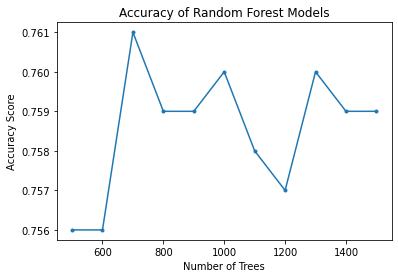

<Figure size 432x288 with 0 Axes>

In [34]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

xArray = np.array([500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500])

n_estimators_array = np.array([0.756, 0.756, 0.761, 0.759, 0.759, 0.760, 0.758, 0.757, 0.760, 0.759, 0.759])

plt.plot(xArray, n_estimators_array, marker=".")

plt.title('Accuracy of Random Forest Models')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy Score')

plt.show()
plt.savefig('random_forest_plot.png')

In [20]:
"""
Random Forest
"""

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

randfor = RandomForestClassifier(n_estimators = 800)
randfor.fit(X_train, y_train)
y_pred = randfor.predict(X_test)
accuracy_score(y_test, y_pred)

0.7791411042944786

In [21]:
# accuracy score:
# 0.779

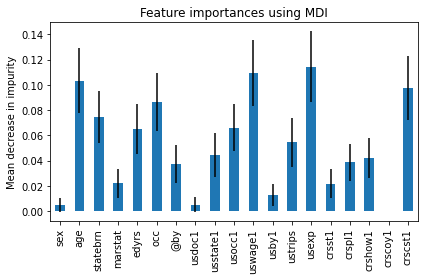

In [19]:
"""
Random Forest feature importance
"""

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

randfor = RandomForestClassifier(n_estimators = 800)
randfor.fit(X_train, y_train)

importances = randfor.feature_importances_
std = np.std([tree.feature_importances_ for tree in randfor.estimators_], axis=0)

forest_importances = pd.Series(importances, index=['sex','age','statebrn','marstat','edyrs','occ','@by','usdoc1','usstate1','usocc1','uswage1','usby1',
             'ustrips','usexp','crsst1','crspl1','crshow1','crscoy1','crscst1'])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.savefig("feature_importance.png")